<a href="https://colab.research.google.com/github/shubhvash/lazyprogrammer-colab-notebooks/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape (60000, 28, 28)


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2976 - accuracy: 0.9131 - val_loss: 0.1464 - val_accuracy: 0.9539
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1441 - accuracy: 0.9563 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1098 - accuracy: 0.9669 - val_loss: 0.0944 - val_accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0892 - accuracy: 0.9725 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0780 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9786 - val_loss: 0.0719 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0600 - accuracy: 0.9802 - val_loss: 0.0706 - val_accuracy:

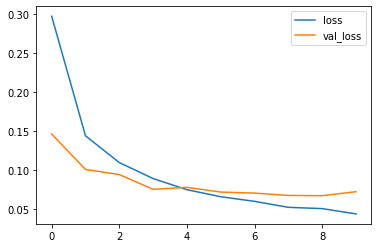

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

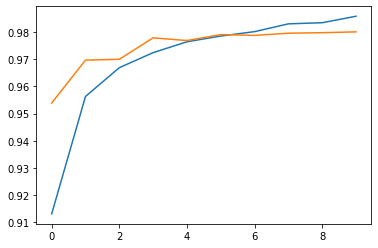

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

In [10]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9801
[0.07237308472394943, 0.9800999760627747]
